# Model 54
- catboost with 1000+ features
- Try to reduce to good features

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import os
%matplotlib inline

In [24]:
MODEL_NUMBER = 'M054'

In [25]:
fi = pd.DataFrame()
types = ['1JHC', '1JHN', '2JHC', '2JHN', '2JHH', '3JHC', '3JHN', '3JHH']
for t in types:
    for f in os.listdir(f'../type_results/{t}'):
        if 'fi' in f and MODEL_NUMBER in f:
            print(f)
            df = pd.read_parquet(f'../type_results/{t}/{f}')
            fi = pd.concat([fi, df])

M054_0726_1820_2JHH_fi_0.1199MAE_-2.121LMAE_catboost_3folds_10000iter_0.1lr.parquet


In [26]:
use_feats = pd.DataFrame()
for i, d in fi.groupby('type'):
    print(i)
    d2 = d.groupby('feature')[['importance']].max()
    use_feats[i] = d2['importance'] > 0.001

2JHH


In [5]:
# use_feats.to_csv('../fi/Good_Features_By_Type.csv')

In [6]:
# fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(20, 30))
# axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
# ax_idx = 0
# for t in use_feats.columns.tolist():
#     fi_t = fi.loc[fi['type'] == t]
#     fi_t = fi_t.loc[fi_t['importance'] >= 0.001]
#     #plt.figure(figsize=(12, 20))
#     sns.barplot(x='importance',
#                 y='feature',
#                 data=fi_t.sort_values('importance',
#                                     ascending=False),
#                ax=axes[ax_idx])
#     axes[ax_idx].set_title(f'Type {t}')
#     ax_idx += 1
# plt.show()

# Meta Feature Importance

In [7]:
fi_meta = pd.DataFrame()
types = ['1JHC', '1JHN', '2JHC', '2JHN', '2JHH', '3JHC', '3JHN', '3JHH']
for t in types:
    for f in os.listdir(f'../type_results/{t}/meta/'):
        if 'fi' in f and MODEL_NUMBER in f:
            print(f)
            df = pd.read_parquet(f'../type_results/{t}/meta/{f}')
            fi_meta = pd.concat([fi_meta, df])

M054_0726_1126_1JHC_fi_meta_fc_f2_0.6638MAE_-0.4098LMAE.parquet
M054_0726_1126_1JHC_fi_meta_fc_f3_0.6622MAE_-0.4122LMAE.parquet
M054_0726_1126_1JHC_fi_meta_fc_f1_0.6624MAE_-0.4119LMAE.parquet
M054_0726_1820_1JHN_fi_meta_fc_f3_0.5358MAE_-0.6239LMAE.parquet
M054_0726_1820_1JHN_fi_meta_fc_f2_0.5282MAE_-0.6384LMAE.parquet
M054_0726_1820_1JHN_fi_meta_fc_f1_0.5536MAE_-0.5913LMAE.parquet
M054_0726_1126_2JHC_fi_meta_fc_f3_0.2869MAE_-1.2488LMAE.parquet
M054_0726_1126_2JHC_fi_meta_fc_f1_0.2861MAE_-1.2514LMAE.parquet
M054_0726_1126_2JHC_fi_meta_fc_f2_0.2852MAE_-1.2547LMAE.parquet
M054_0726_1820_2JHN_fi_meta_fc_f1_0.2147MAE_-1.5385LMAE.parquet
M054_0726_1820_2JHN_fi_meta_fc_f3_0.2140MAE_-1.5416LMAE.parquet
M054_0726_1820_2JHN_fi_meta_fc_f2_0.2153MAE_-1.5356LMAE.parquet
M054_0726_1820_2JHH_fi_meta_fc_f3_0.1530MAE_-1.8774LMAE.parquet
M054_0726_1820_2JHH_fi_meta_fc_f2_0.1538MAE_-1.8723LMAE.parquet
M054_0726_1820_2JHH_fi_meta_fc_f1_0.1542MAE_-1.8692LMAE.parquet
M054_0726_2144_3JHC_fi_meta_fc_f1_0.3372

In [8]:
# sns.set(style="whitegrid")
# sns.set_color_codes("pastel")

# #fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(8, 1, figsize=(30, 60))
# #axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
# #ax_idx = 0
# for t in use_feats.columns.tolist():
#     fi_t = fi_meta.loc[fi_meta['type'] == t]
#     fi_t = fi_t.loc[fi_t['importance'] >= 0.001]
#     plt.figure(figsize=(12, 20))
#     ax = sns.barplot(x='importance',
#                 y='feature',
#                 data=fi_t.sort_values('importance',
#                                     ascending=False),
#                 color="b")
#     ax.set_title(f'Type {t}')
#     #ax_idx += 1
#     plt.show()

In [9]:
fi_meta['importance'].max()

47.148444081981175

In [10]:
fi_meta['importance'].mean()


0.09849499645418054

In [11]:
fi_meta['importance'].std()

0.851558028240117

In [12]:
use_feats_meta = pd.DataFrame()
for i, d in fi_meta.groupby('type'):
    #print(i)
    d2 = d.groupby('feature')[['importance']].max()
    use_feats_meta[i] = d2['importance'] > 0.01
use_feats_meta.sum()

1JHC    351.0
1JHN    275.0
2JHC    336.0
2JHH    299.0
2JHN    249.0
3JHC    376.0
3JHH    239.0
3JHN    413.0
dtype: float64

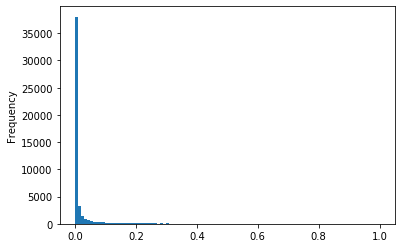

In [13]:
fi_meta.loc[fi_meta['importance'] < 1]['importance'].plot(kind='hist', bins=100)

In [14]:
use_feats_meta.loc[use_feats_meta['3JHH'] == True].index.tolist()

['2nd_closest_to_0_exact_mass',
 '2nd_closest_to_0_valence',
 '2nd_closest_to_0_valence_x_cube_inv_dist',
 '2nd_closest_to_1_exact_mass',
 '2nd_closest_to_1_valence',
 '2nd_closest_to_1_valence_x_cube_inv_dist',
 '3rd_closest_to_0_exact_mass',
 '3rd_closest_to_0_valence',
 '3rd_closest_to_0_valence_x_cube_inv_dist',
 '3rd_closest_to_1_exact_mass',
 '3rd_closest_to_1_valence',
 '3rd_closest_to_1_valence_x_cube_inv_dist',
 '4th_closest_to_0',
 '4th_closest_to_0_spin_multiplicity_x_cube_inv_dist',
 '4th_closest_to_0_valence',
 '4th_closest_to_0_valence_x_cube_inv_dist',
 '4th_closest_to_1_exact_mass',
 '4th_closest_to_1_valence',
 '4th_closest_to_1_valence_x_cube_inv_dist',
 '5th_closest_to_0_valence_x_cube_inv_dist',
 '5th_closest_to_1_valence_x_cube_inv_dist',
 '6th_closest_to_0_valence_x_cube_inv_dist',
 '6th_closest_to_1_exact_mass',
 '6th_closest_to_1_valence_x_cube_inv_dist',
 '7th_closest_to_0_valence_x_cube_inv_dist',
 '7th_closest_to_1_valence_x_cube_inv_dist',
 '8th_closest_to_0

In [15]:
use_feats_meta.tail()

,1JHC,1JHN,2JHC,2JHH,2JHN,3JHC,3JHH,3JHN
feature,,,,,,,,
z0,False,False,False,False,False,False,False,True
z1,False,False,False,False,False,False,False,False
z_a0_nb,False,False,False,False,False,False,False,True
z_a1_nb,False,False,False,False,False,False,False,True
zpve,False,False,False,False,False,False,False,False


In [16]:
use_feats_meta.shape

(1038, 8)

In [17]:
use_feats_meta.to_csv(f'../fi/FI_ANALYSIS_{MODEL_NUMBER}_GOODFEATS.csv')

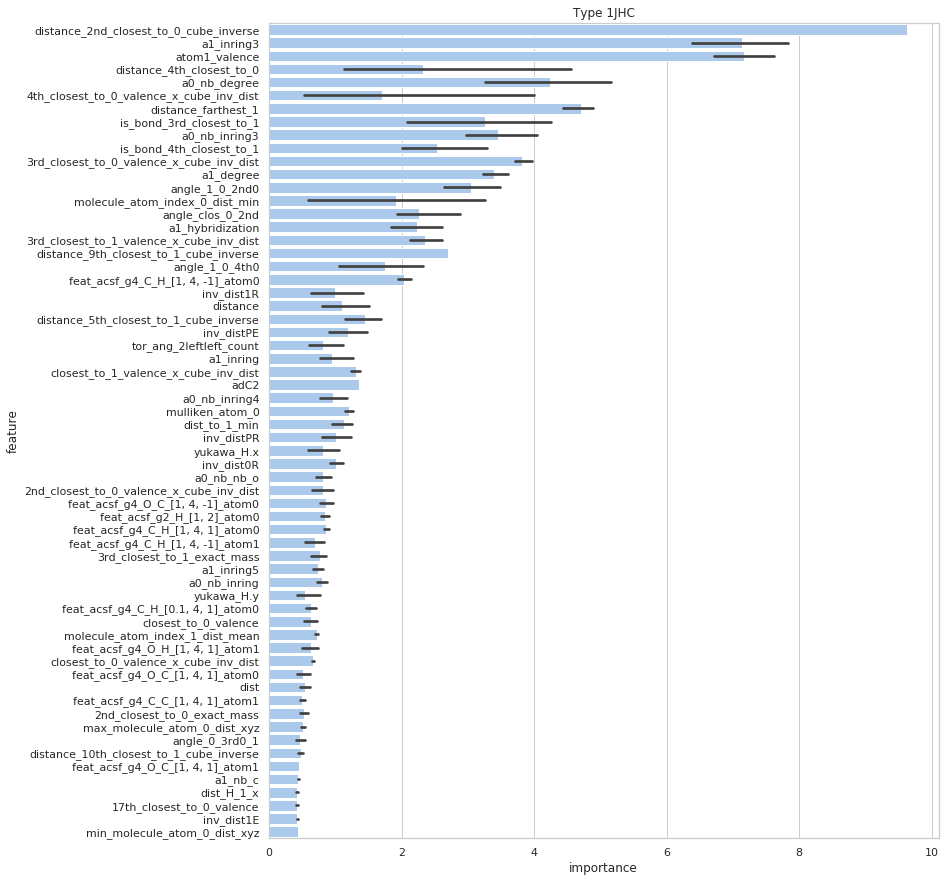

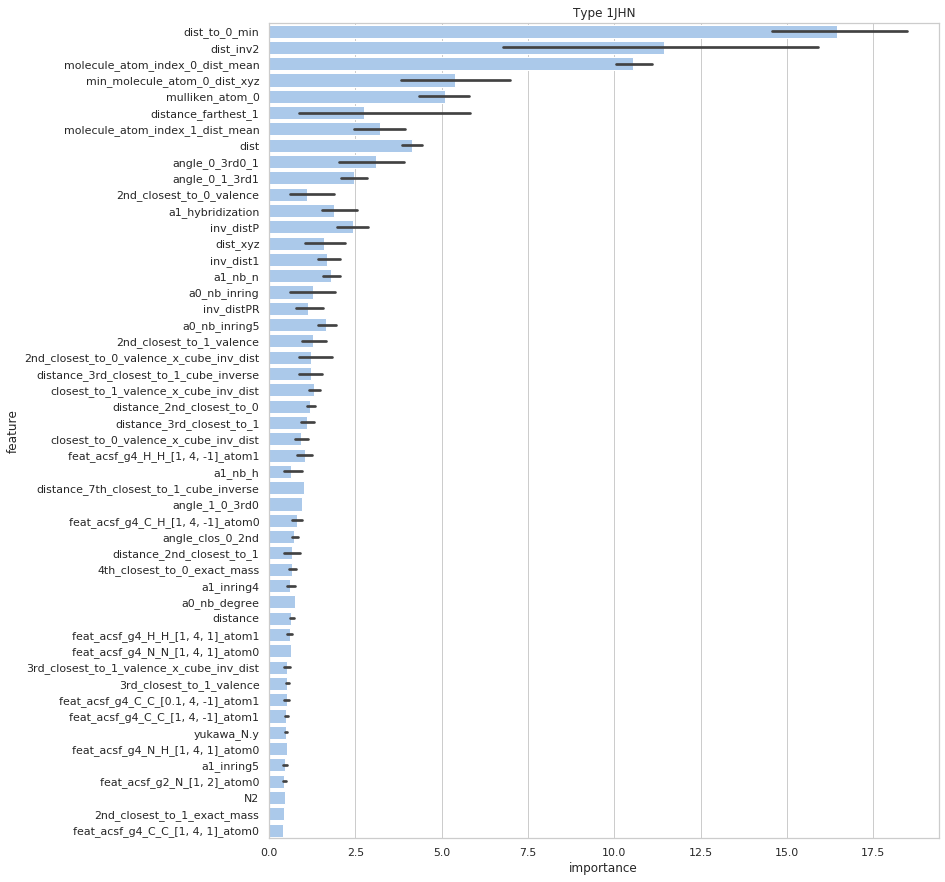

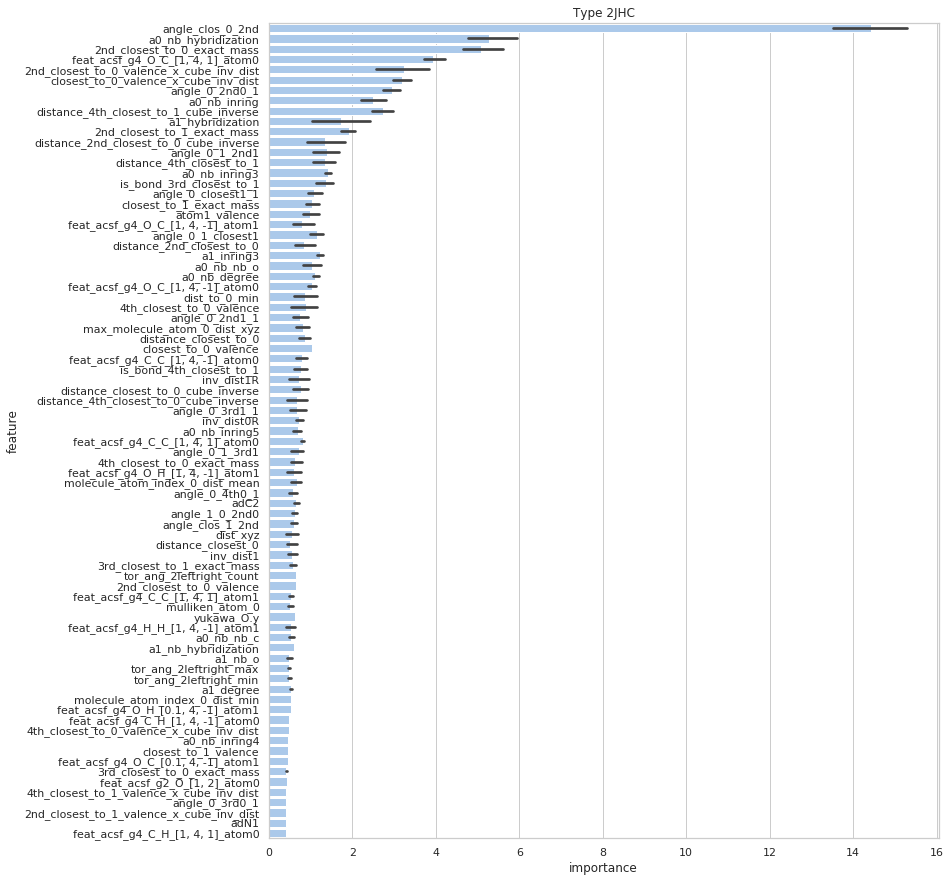

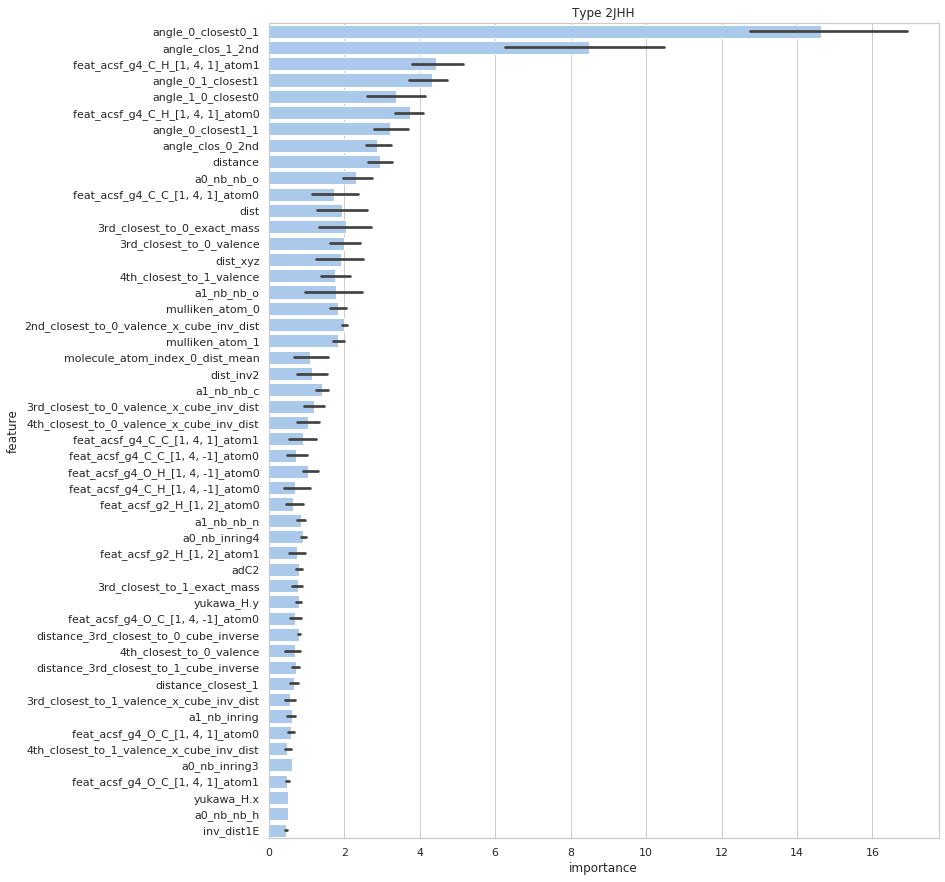

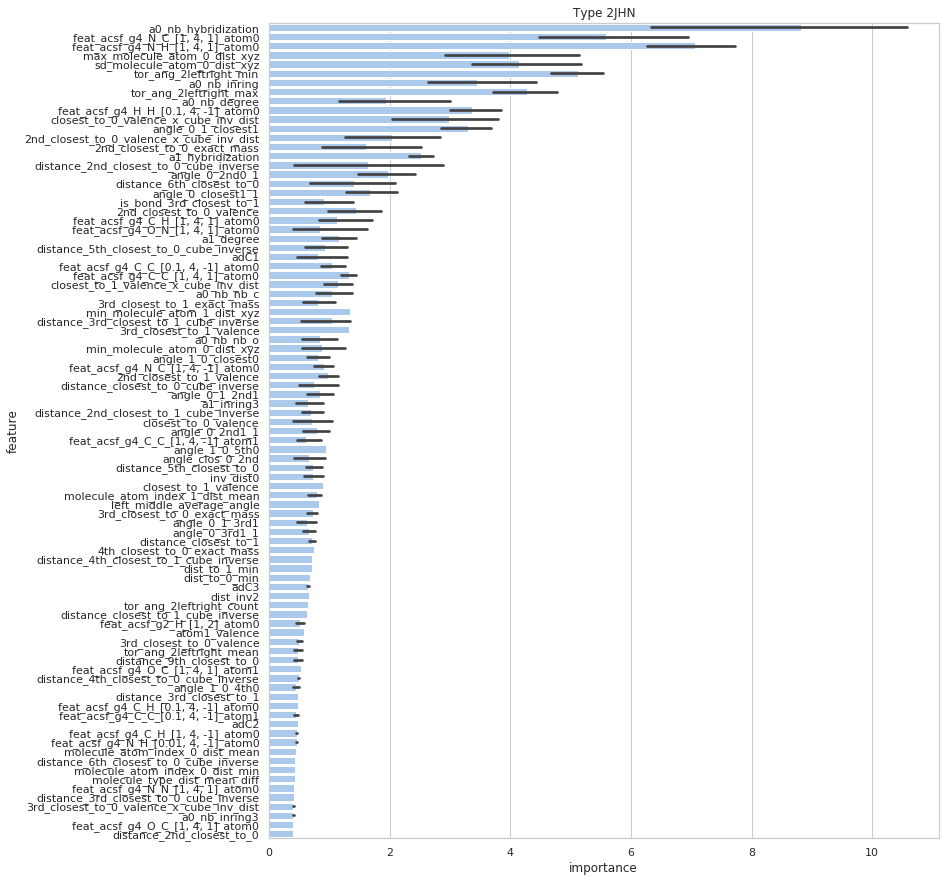

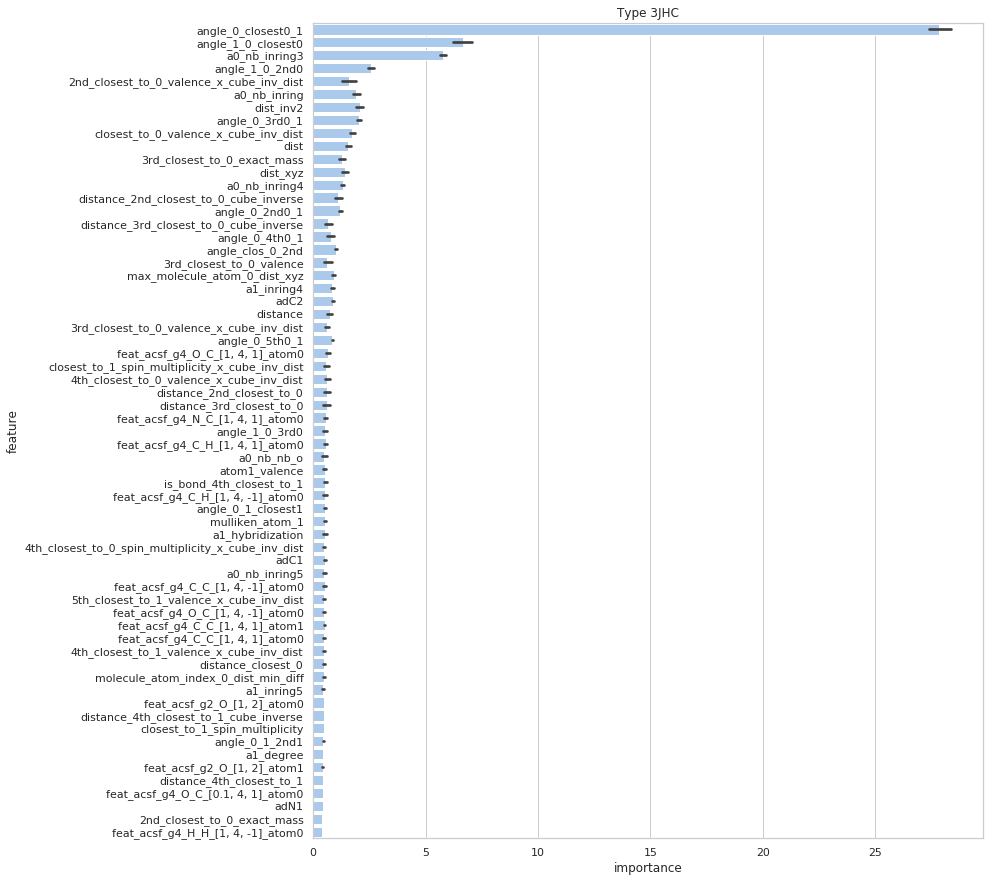

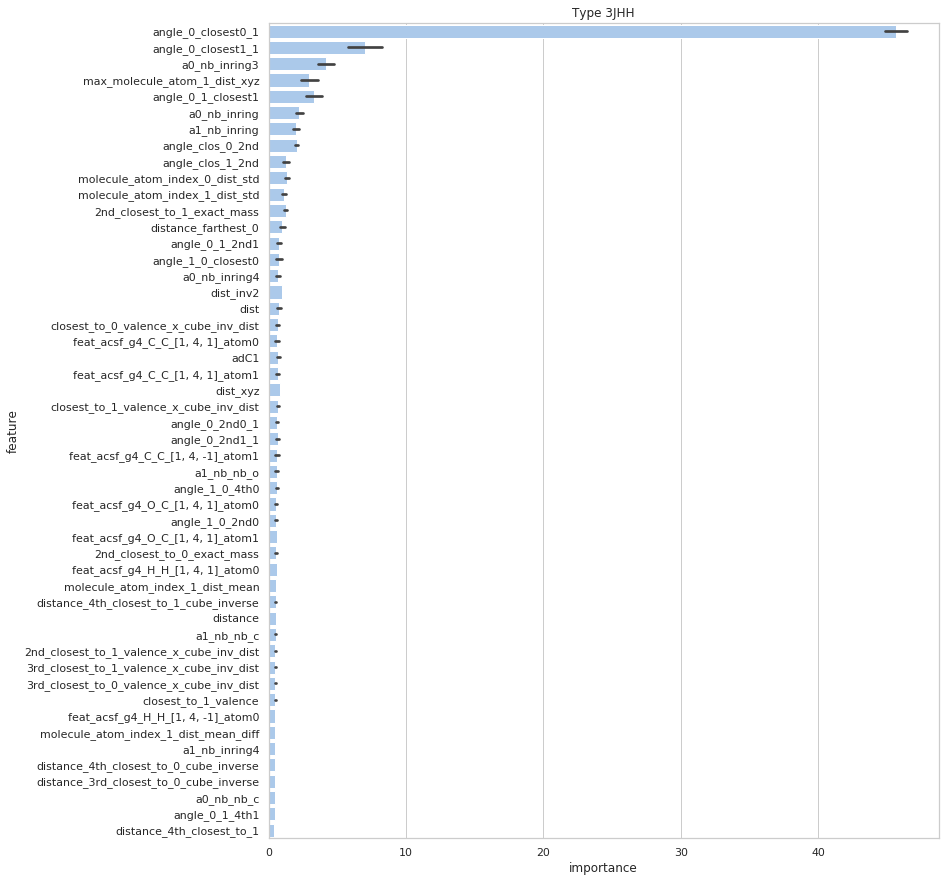

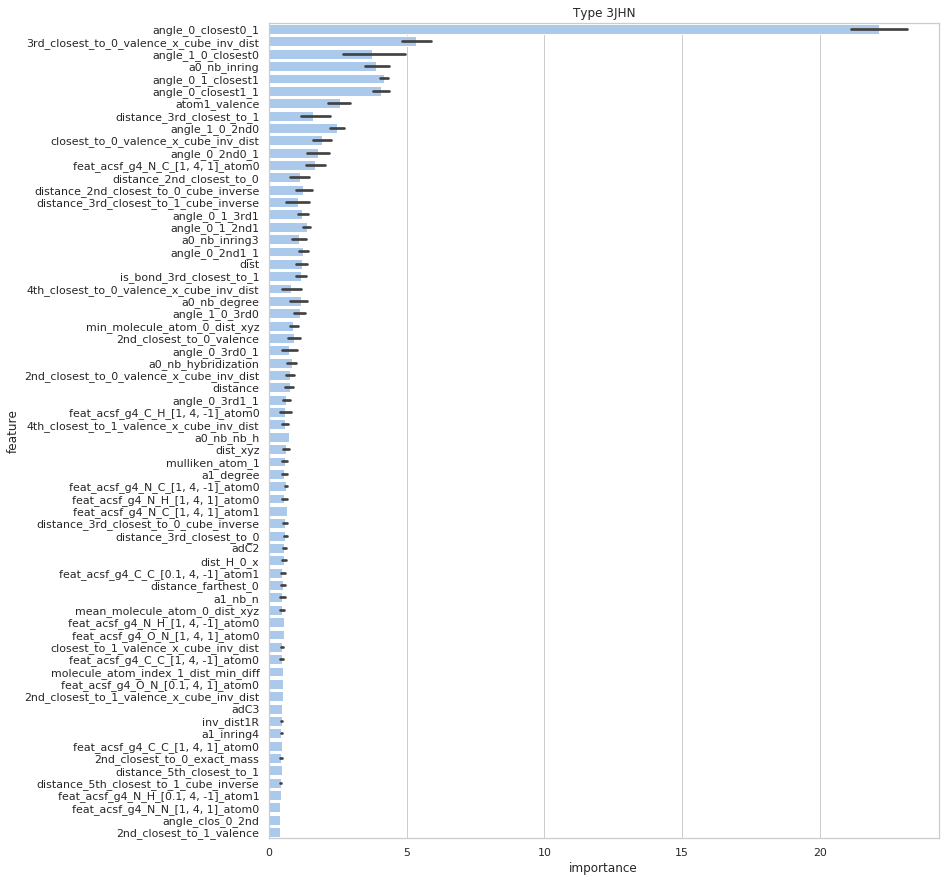

In [22]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")

#fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(8, 1, figsize=(30, 60))
#axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
#ax_idx = 0
for t in use_feats.columns.tolist():
    fi_t = fi_meta.loc[fi_meta['type'] == t]
    fi_t = fi_t.loc[fi_t['importance'] >= 0.4]
    plt.figure(figsize=(12, 15))
    ax = sns.barplot(x='importance',
                y='feature',
                data=fi_t.sort_values('importance',
                                    ascending=False),
                color="b")
    ax.set_title(f'Type {t}')
    #ax_idx += 1
    plt.show()